# Cleaning Profile Data
The profiles are composed by consumption and production data. The data is real and anonymized, which will provided a more realistic representation of the behaviour of the systems in this study. The data is composed by:
- Consumption data: 69 time stamped data with the duration of one year.
- PV Production data: 10 time stamped data with the duration of one year.
- Wind Production data: 20 time stamped data with the duration of one year.


## PV Production Data
First, it is necessary to import the data and explore its structure.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# import utils from thesis_package in the parent directory.
import sys
sys.path.append('..')
from thesis_package import utils as ut

Import the data into the python jupyter notebook.

In [66]:
# Get path to the parent folder.
# Import each data frame into a list.
def describe_data(data):
    print('Number of df: ', len(data))
    print('Head of df: \n', data[0].head())
    # Describre the dataframes.
    for i, df  in enumerate(data):
        print('File: ', i)
        print(df.describe())
        print('___________________________')
data_path = '..\data\\raw\profile\PV\IPMA (2 years 2020-2021)\\'
pv_data = ut.get_csv_from_folder(data_path)
describe_data(pv_data)

Number of df:  10
Head of df: 
                   date  value   T   R
0  2020-01-01 00:00:00    0.0 NaN NaN
1  2020-01-01 00:15:00    0.0 NaN NaN
2  2020-01-01 00:30:00    0.0 NaN NaN
3  2020-01-01 00:45:00    0.0 NaN NaN
4  2020-01-01 01:00:00    0.0 NaN NaN
File:  0
              value             T             R
count  70176.000000  70153.000000  70153.000000
mean     383.269572    288.969642    747.648987
std      559.559322      3.871006    739.292716
min        0.000000    275.930000      0.000000
25%        0.000000    286.407333     87.480646
50%        0.000000    288.729667    535.380093
75%      706.000000    291.471250   1217.935185
max     1909.000000    304.526000   2838.527778
___________________________
File:  1
              value             T             R
count  34238.000000  70153.000000  70153.000000
mean    1670.871838    290.069160    757.128517
std     2393.891953      5.158342    743.964051
min        0.000000    273.663000      0.000000
25%        0.000000   

#### PV: Raw Data Description:
The full dataset is composed by a total of 10 time stamped data with the duration of one to two years. The the data is composed by the following features:
- Time: Time stamp of the data.
- PV Production: PV production power in kW.
- Temperature: Temperature in degrees K.
- Irradiance: Irradiance in W/m2.

### PV: Analysing Missing Values
The data contains missing values. Since the production values are the focous for this study, it is necessary to deal with the missing values. In order to better understand the distribution of the missing values, the following questions will be answared:
- Number of missing values?
- Percentage of missing values overall?
- Percentage of missing values per year?
- Percentage of missing values per month?

In [67]:
def add_year_month_to_df(data):
    for df in data:
        df['year'] = df.date.apply(lambda x: x.split('-')[0])
        df['month'] =  df.date.apply(lambda x: x.split('-')[1])
add_year_month_to_df(pv_data)

In [68]:
# Get percentage of missing data per file per feature.
def get_percentage_of_per_feature(i, df):
    df_result = pd.DataFrame()
    for feature in df.columns:
        if feature != 'date' and feature != 'year' and feature != 'month':
            df_result.loc[i, feature] = 100 * df[feature].isnull().sum() / len(df)
    return df_result
def get_percentage_of_missing_data_per_file_per_feature(data):
    result = pd.DataFrame()
    for i, df in enumerate(data):
        result  = pd.concat([result, get_percentage_of_per_feature(i, df)], axis=0)
    return result
# Get percentage of missing data per file per year and/or month per feature.
def get_percentage_of_missing_values_per(data, time_frame=['year']):
    result = []
    for df in data:
        df_result = pd.DataFrame()
        for feature in df.columns:
                    if feature != 'date' and feature != 'year' and feature != 'month':
                        df_result[feature] = df.groupby(time_frame)[feature].apply(lambda x: 100 * x.isnull().sum() / len(x))
        result.append(df_result)
    return result

In [69]:
percentage_of_missing_data_per_file_per_feature = get_percentage_of_missing_data_per_file_per_feature(pv_data)
percentage_of_missing_values_per_year = get_percentage_of_missing_values_per(pv_data, time_frame=['year'])
percentage_of_missing_values_per_year_per_month = get_percentage_of_missing_values_per(pv_data, time_frame=['year', 'month'])

Analysing the percentage of missing data per file. we have that:

In [70]:
percentage_of_missing_data_per_file_per_feature

,value,T,R
0,0.000000,0.032775,0.032775
1,51.203592,0.017103,0.017103
2,22.116440,0.017103,0.017103
3,2.771603,0.032775,0.032775
4,2.771603,0.032775,0.032775
5,0.000000,0.032775,0.032775
6,0.000000,0.032775,0.032775
7,0.000000,0.032775,0.032775
8,1.335214,0.032775,0.032775
9,0.000000,0.032775,0.032775


From the `percentage_of_missing_data_per_file_per_feature` dataframe we can note that the file 1  and 2 contain around 50% and 20% of missing values, respectively. 

Analysing the percentage of missing data per file per year, we have that:

In [71]:
percentage_of_missing_values_per_year

[      value         T         R
 year                           
 2020    0.0  0.034153  0.034153
 2021    0.0  0.031393  0.031393,
            value         T         R
 year                                
 2020    2.555783  0.034153  0.034153
 2021  100.000000  0.000000  0.000000,
           value         T         R
 year                               
 2020   0.000000  0.034153  0.034153
 2021  44.300437  0.000000  0.000000,
          value         T         R
 year                              
 2020  5.535633  0.034153  0.034153
 2021  0.000000  0.031393  0.031393,
          value         T         R
 year                              
 2020  5.535633  0.034153  0.034153
 2021  0.000000  0.031393  0.031393,
       value         T         R
 year                           
 2020    0.0  0.034153  0.034153
 2021    0.0  0.031393  0.031393,
       value         T         R
 year                           
 2020    0.0  0.034153  0.034153
 2021    0.0  0.031393  0.031393,
       va

From the `percentage_of_missing_data_per_file_per_year_per_feature` dataframe we can note the year 2020 has a smaller percentage of missing values, so it is a good choice for obtaining preliminary results. So it is suitable for the cleaning process.

Now we can check the distribution of missing values per month, per year.

In [72]:
percentage_of_missing_values_per_year_per_month

[            value         T         R
 year month                           
 2020 01       0.0  0.403226  0.403226
      02       0.0  0.000000  0.000000
      03       0.0  0.000000  0.000000
      04       0.0  0.000000  0.000000
      05       0.0  0.000000  0.000000
      06       0.0  0.000000  0.000000
      07       0.0  0.000000  0.000000
      08       0.0  0.000000  0.000000
      09       0.0  0.000000  0.000000
      10       0.0  0.000000  0.000000
      11       0.0  0.000000  0.000000
      12       0.0  0.000000  0.000000
 2021 01       0.0  0.000000  0.000000
      02       0.0  0.000000  0.000000
      03       0.0  0.000000  0.000000
      04       0.0  0.000000  0.000000
      05       0.0  0.000000  0.000000
      06       0.0  0.000000  0.000000
      07       0.0  0.000000  0.000000
      08       0.0  0.000000  0.000000
      09       0.0  0.000000  0.000000
      10       0.0  0.000000  0.000000
      11       0.0  0.000000  0.000000
      12       0.0  0.369

From the `percentage_of_missing_data_per_file_per_year_per_month_per_feature` dataframe we can note that the month of february has a a null percentage of missing values, so it is a good choice for obtaining preliminary results.

## Wind Production Data

In [73]:
data_path = '..\data\\raw\profile\Wind\IPMA (2 years 2020-2021)\\'
wind_data = ut.get_csv_from_folder(data_path)
describe_data(wind_data)

Number of df:  20
Head of df: 
                   date  value   T   R  wind_speed  wind_direction
0  2020-01-01 00:00:00    0.0 NaN NaN         NaN             NaN
1  2020-01-01 00:15:00    0.0 NaN NaN         NaN             NaN
2  2020-01-01 00:30:00    0.0 NaN NaN         NaN             NaN
3  2020-01-01 00:45:00    0.0 NaN NaN         NaN             NaN
4  2020-01-01 01:00:00    0.0 NaN NaN         NaN             NaN
File:  0
              value             T             R    wind_speed  wind_direction
count  63524.000000  70153.000000  70153.000000  70153.000000    70153.000000
mean    3001.348932    289.893199    798.823422      7.403072      239.481862
std     2874.484190      3.707198    760.917081      3.207411      113.411583
min        0.000000    275.922000      0.000000      0.122154        0.058645
25%      520.000000    287.412000     98.727006      4.861206      127.899805
50%     2040.000000    289.783667    610.015278      7.260239      288.147924
75%     5000.0000

#### Wind: Raw Data Description:
The full dataset is composed by a total of 20 time stamped data with the duration of one to two years. The the data is composed by the following features:
- Time: Time stamp of the data.
- Wind Production: Wind production power in kW.
- Temperature: Temperature in degrees K.
- Irradiance: Irradiance in W/m2.
- Wind Speed: Wind speed in m/s.
- Wind Direction: Wind direction in degrees.

In [74]:
add_year_month_to_df(wind_data)
percentage_of_missing_data_per_file_per_feature = get_percentage_of_missing_data_per_file_per_feature(wind_data)
percentage_of_missing_values_per_year = get_percentage_of_missing_values_per(wind_data, time_frame=['year'])
percentage_of_missing_values_per_year_per_month = get_percentage_of_missing_values_per(wind_data, time_frame=['year', 'month'])

In [75]:
percentage_of_missing_data_per_file_per_feature

,value,T,R,wind_speed,wind_direction
0,9.479024,0.032775,0.032775,0.032775,0.032775
1,0.000000,0.032775,0.032775,0.032775,0.032775
2,0.000000,0.032775,0.032775,0.032775,0.032775
3,0.000000,0.032775,0.032775,0.032775,0.032775
4,5.159884,0.032775,0.032775,0.032775,0.032775
5,0.000000,0.032775,0.032775,0.032775,0.032775
6,0.000000,0.032775,0.032775,0.032775,0.032775
7,0.000000,0.032775,0.032775,0.032775,0.032775
8,0.000000,0.032775,0.032775,0.032775,0.032775
9,0.000000,0.032775,0.032775,0.032775,0.032775


From the `percentage_of_missing_data_per_file_per_feature` dataframe we can note that there is not any file with more than 15% of any feature missing.

Now we check if the month of february has a null percentage of missing values.

In [76]:
percentage_of_missing_values_per_year_per_month

[                 value         T         R  wind_speed  wind_direction
 year month                                                            
 2020 01       0.000000  0.403226  0.403226    0.403226        0.403226
      02       0.000000  0.000000  0.000000    0.000000        0.000000
      03       0.000000  0.000000  0.000000    0.000000        0.000000
      04       0.000000  0.000000  0.000000    0.000000        0.000000
      05       0.000000  0.000000  0.000000    0.000000        0.000000
      06       0.000000  0.000000  0.000000    0.000000        0.000000
      07       0.000000  0.000000  0.000000    0.000000        0.000000
      08       0.000000  0.000000  0.000000    0.000000        0.000000
      09       0.000000  0.000000  0.000000    0.000000        0.000000
      10       0.000000  0.000000  0.000000    0.000000        0.000000
      11       0.000000  0.000000  0.000000    0.000000        0.000000
      12       0.000000  0.000000  0.000000    0.000000        0

From the output above, it is confirmed that indeed the month of february has a null percentage of missing values.

## Consumption Data

In [77]:
data_path = '..\data\\raw\profile\Conso\Clean Data\\'
conso_data = ut.get_csv_from_folder(data_path)
describe_data(conso_data)
add_year_month_to_df(conso_data)

Number of df:  64
Head of df: 
                   date     P    Q           T           R
0  2020-01-01 00:00:00  70.0  2.0  281.969500  405.454167
1  2020-01-01 00:15:00  72.0  2.0  281.924375  371.666319
2  2020-01-01 00:30:00  68.0  2.0  281.879250  337.878472
3  2020-01-01 00:45:00  70.0  6.0  281.834125  304.090625
4  2020-01-01 01:00:00  72.0  5.0  281.789000  270.302778
File:  0
                  P             Q             T             R
count  45569.000000  45569.000000  45569.000000  45569.000000
mean     122.579627     27.089359    287.147408    648.861610
std       53.927606     18.626930      5.445740    668.677534
min       22.000000     -3.000000    272.962000      0.000000
25%       79.000000     12.000000    283.646458     76.829062
50%      110.000000     22.000000    286.565833    447.426389
75%      158.000000     41.000000    290.329333   1001.572531
max      359.000000     98.000000    307.022000   2815.203704
___________________________
File:  1
                

### Consumption: Raw Data Description:
The full dataset is composed by a total of 69 time stamped data with the duration of one year. The the data is composed by the following features:
- Time: Time stamp of the data.
- Active Power Consumption: Consumption in kW.
- Reactive Power Consumption: Reactive power consumption in kVAr.
- Temperature: Temperature in degrees K.
- Irradiance: Irradiance in W/m2.

In [78]:
percentage_of_missing_data_per_file_per_feature = get_percentage_of_missing_data_per_file_per_feature(conso_data)

In [79]:
percentage_of_missing_data_per_file_per_feature

,P,Q,T,R
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
59,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0


From the `percentage_of_missing_data_per_file_per_feature` dataframe we do not have any missing data.

## Data Pre-processing
Since it is considered that the PV and Wind productors are in the same area, it is possible to consider the same dataset for all productors, adding a small deviation of 20% to the production values.

### PV: Data Pre-processing
Since the file 0 does not contain any missing production values we can use it as a reference to obtain the profile of the PV production for all productors. In terms of production value, it will be done by normalizing the profile, and then adding a small deviation of 20% to the production values for each productor, and then multiplying the profile by the given installed power. The profile will be normalized by the maximum value of the profile. 

In terms of temperature T and irradiance I, some missing values are present, so we will use the mean value of the profile for each feature.

In [80]:
target_pv_data = pv_data[0]
target_pv_data.describe
percentage_of_missing_values_per_year_per_month = get_percentage_of_missing_values_per(pv_data, time_frame=['year', 'month'])[0]

In [81]:
percentage_of_missing_values_per_year_per_month

value         T         R
year month                           
2020 01       0.0  0.403226  0.403226
     02       0.0  0.000000  0.000000
     03       0.0  0.000000  0.000000
     04       0.0  0.000000  0.000000
     05       0.0  0.000000  0.000000
     06       0.0  0.000000  0.000000
     07       0.0  0.000000  0.000000
     08       0.0  0.000000  0.000000
     09       0.0  0.000000  0.000000
     10       0.0  0.000000  0.000000
     11       0.0  0.000000  0.000000
     12       0.0  0.000000  0.000000
2021 01       0.0  0.000000  0.000000
     02       0.0  0.000000  0.000000
     03       0.0  0.000000  0.000000
     04       0.0  0.000000  0.000000
     05       0.0  0.000000  0.000000
     06       0.0  0.000000  0.000000
     07       0.0  0.000000  0.000000
     08       0.0  0.000000  0.000000
     09       0.0  0.000000  0.000000
     10       0.0  0.000000  0.000000
     11       0.0  0.000000  0.000000
     12       0.0  0.369624  0.369624

There is some missing data in of January 2021 and December 2022, so we will plot these periods in order to better understand the behaviour of the data. 

In [82]:
# Plot data of January 2020 and December 2021.
def plot_missing_values_jan_dec(target_data, feature):
    _data_jan = target_data[(target_data.month == '01') & (target_data.year == '2020') ][['date',feature]]
    _data_dec = target_data[(target_data.month == '12') & (target_data.year == '2021') ][['date',feature]]
    fig, ax = plt.subplots(2,1, figsize=(20,10))
    # plot for January 2020.
    ax[0].plot(_data_jan['date'], _data_jan[feature].fillna(0))
    ax[0].set_title('{} January 2020'.format(feature))
    # plot for December 2021.
    ax[1].plot(_data_dec['date'], _data_dec[feature].fillna(0))
    ax[1].set_title('{} December 2021'.format(feature))
    plt.show()

#### Temperature

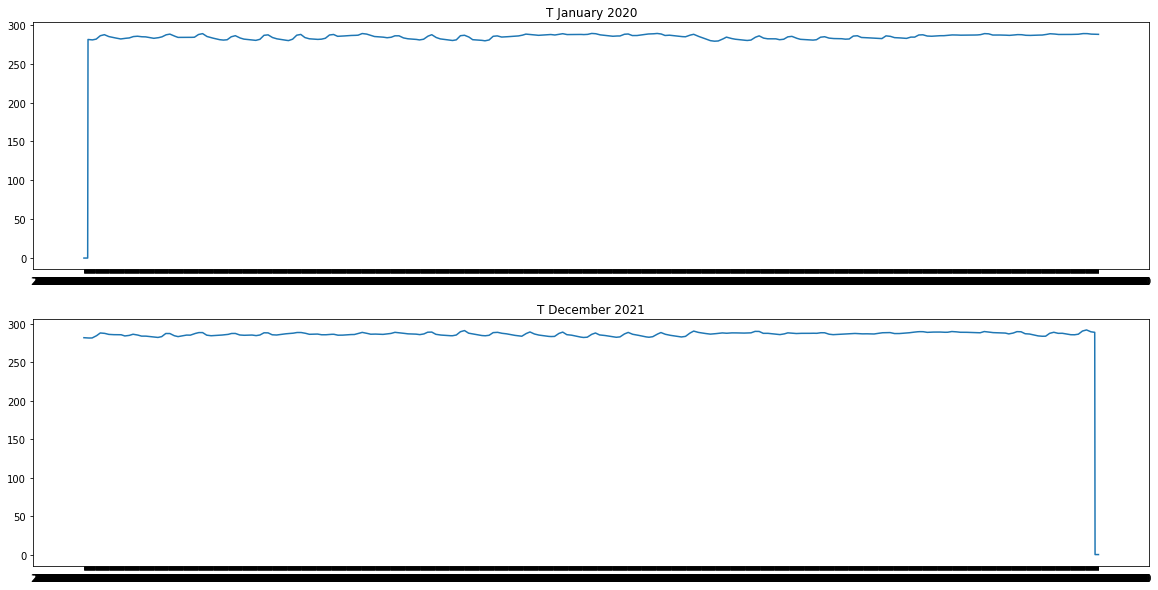

In [83]:
plot_missing_values_jan_dec(target_pv_data, 'T')

From the plots above the missing is concentrated in towords the beguining and end of the months of January and December, respectivley. Therefore it is a good choice to check which part of days are missing, and input with the same period from another day.

In [84]:
target_pv_data[target_pv_data['T'].isnull() == True]['date']

0        2020-01-01 00:00:00
1        2020-01-01 00:15:00
2        2020-01-01 00:30:00
3        2020-01-01 00:45:00
4        2020-01-01 01:00:00
5        2020-01-01 01:15:00
6        2020-01-01 01:30:00
7        2020-01-01 01:45:00
8        2020-01-01 02:00:00
9        2020-01-01 02:15:00
10       2020-01-01 02:30:00
11       2020-01-01 02:45:00
70165    2021-12-31 21:15:00
70166    2021-12-31 21:30:00
70167    2021-12-31 21:45:00
70168    2021-12-31 22:00:00
70169    2021-12-31 22:15:00
70170    2021-12-31 22:30:00
70171    2021-12-31 22:45:00
70172    2021-12-31 23:00:00
70173    2021-12-31 23:15:00
70174    2021-12-31 23:30:00
70175    2021-12-31 23:45:00
Name: date, dtype: object

In order to check the behaviour of the temperature, similar periods of January and December are plotted.

In [85]:
# Plot data from a specific data and time limits.
def plot_data_from_time_limits(target_data, feature, time_limits):
    _data = target_data[(target_data.date >= time_limits[0]) & (target_data.date <= time_limits[1]) ][['date',feature]]
    fig, ax = plt.subplots(1,1, figsize=(20,10))
    ax.scatter(_data['date'], _data[feature])
    ax.set_title('{} {}'.format(feature, time_limits))
    plt.show()

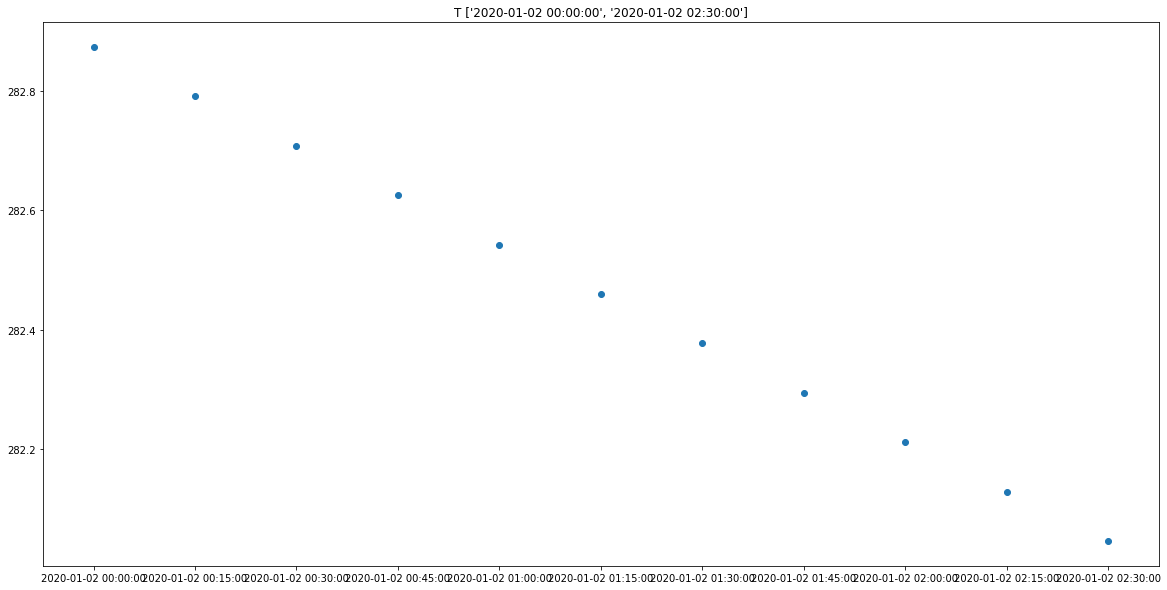

In [86]:
plot_data_from_time_limits(target_pv_data, 'T', ['2020-01-02 00:00:00',  '2020-01-02 02:30:00'])

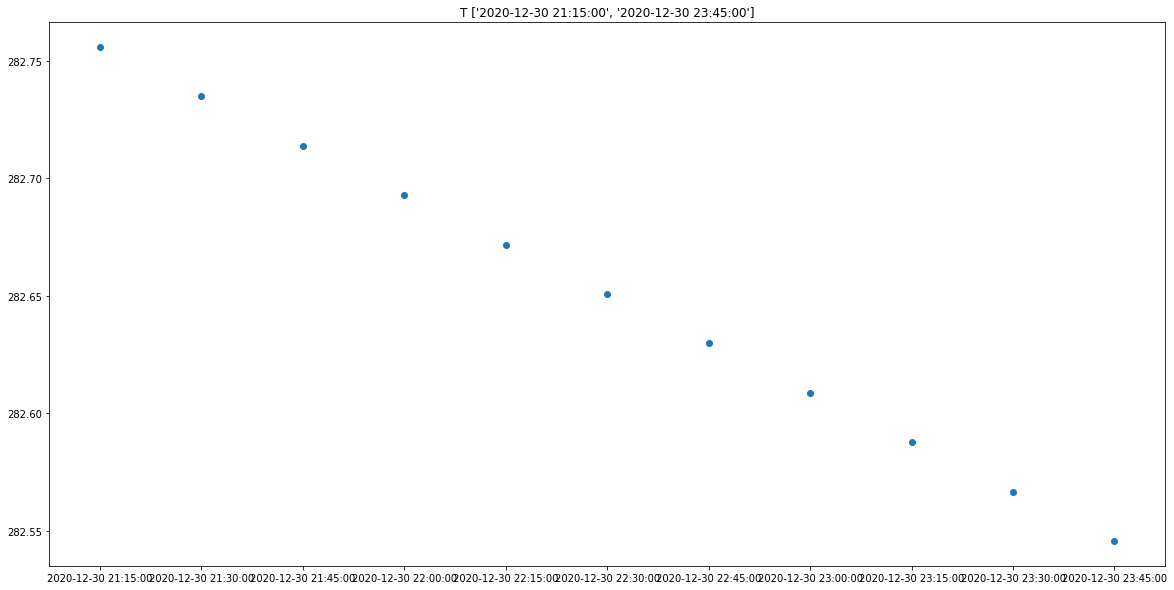

In [87]:
plot_data_from_time_limits(target_pv_data, 'T', ['2020-12-30 21:15:00',  '2020-12-30 23:45:00'])

Since, for this time frames, the data is appoximetelly linear we can use the same profile for the periods with missing data.

In [89]:
# Get index values of a time frame.
def get_index_of_time_frame(target_data, time_frame):
    _data = target_data[(target_data.date >= time_frame[0]) & (target_data.date <= time_frame[1])]
    return _data.index

In [90]:
# January
target_index_jan = list(range(0,12))
filler_index_jan = get_index_of_time_frame(target_pv_data, ['2020-01-02 00:00:00',  '2020-01-02 02:45:00'])
target_pv_data.loc[target_index_jan, 'T'] = target_pv_data.iloc[filler_index_jan]['T']

In [91]:
# December
target_index_dec = list(range(70165, 70175))
filler_index_dec = get_index_of_time_frame(target_pv_data, ['2021-12-31 21:15:00',  '2021-12-31 23:45:00'])
target_pv_data.loc[target_index_dec, 'T'] = target_pv_data.iloc[filler_index_dec]['T']

#### Irradiance

In [95]:
percentage_of_missing_values_per_year_per_month = get_percentage_of_missing_values_per(pv_data, time_frame=['year', 'month'])[0]

In [96]:
percentage_of_missing_values_per_year_per_month

value         T         R
year month                           
2020 01       0.0  0.403226  0.403226
     02       0.0  0.000000  0.000000
     03       0.0  0.000000  0.000000
     04       0.0  0.000000  0.000000
     05       0.0  0.000000  0.000000
     06       0.0  0.000000  0.000000
     07       0.0  0.000000  0.000000
     08       0.0  0.000000  0.000000
     09       0.0  0.000000  0.000000
     10       0.0  0.000000  0.000000
     11       0.0  0.000000  0.000000
     12       0.0  0.000000  0.000000
2021 01       0.0  0.000000  0.000000
     02       0.0  0.000000  0.000000
     03       0.0  0.000000  0.000000
     04       0.0  0.000000  0.000000
     05       0.0  0.000000  0.000000
     06       0.0  0.000000  0.000000
     07       0.0  0.000000  0.000000
     08       0.0  0.000000  0.000000
     09       0.0  0.000000  0.000000
     10       0.0  0.000000  0.000000
     11       0.0  0.000000  0.000000
     12       0.0  0.369624  0.369624

In [97]:
target_pv_data[target_pv_data['T'].isnull() == True]['date']

0        2020-01-01 00:00:00
1        2020-01-01 00:15:00
2        2020-01-01 00:30:00
3        2020-01-01 00:45:00
4        2020-01-01 01:00:00
5        2020-01-01 01:15:00
6        2020-01-01 01:30:00
7        2020-01-01 01:45:00
8        2020-01-01 02:00:00
9        2020-01-01 02:15:00
10       2020-01-01 02:30:00
11       2020-01-01 02:45:00
70165    2021-12-31 21:15:00
70166    2021-12-31 21:30:00
70167    2021-12-31 21:45:00
70168    2021-12-31 22:00:00
70169    2021-12-31 22:15:00
70170    2021-12-31 22:30:00
70171    2021-12-31 22:45:00
70172    2021-12-31 23:00:00
70173    2021-12-31 23:15:00
70174    2021-12-31 23:30:00
70175    2021-12-31 23:45:00
Name: date, dtype: object

For the irradiance, the missing data is on the same periods as for the temperature data, so it is adequate to use the same approach as it was used for the temperature.

In [99]:
# January
target_index_jan = list(range(0,12))
filler_index_jan = get_index_of_time_frame(target_pv_data, ['2020-01-02 00:00:00',  '2020-01-02 02:45:00'])
target_pv_data.loc[target_index_jan, 'R'] = target_pv_data.iloc[filler_index_jan]['R']
# December
target_index_dec = list(range(70165, 70175))
filler_index_dec = get_index_of_time_frame(target_pv_data, ['2021-12-31 21:15:00',  '2021-12-31 23:45:00'])
target_pv_data.loc[target_index_dec, 'R'] = target_pv_data.iloc[filler_index_dec]['R']


### Wind: Data Proprocessing
Since the file 1 of the Wind productor does not contain any missing production values we can use it as a reference to obtain the profile of the Wind production for all productors. In terms of production value, it will be done by normalizing the profile, and then adding a small deviation of 20% to the production values for each productor, and then multiplying the profile by the given installed power. The profile will be normalized by the maximum value of the profile.

In terms of temperature T and irradiance I, some missing values are present, so we will use the mean value of the profile for each feature.

In [94]:
target_wind_data = wind_data[1]
percentage_of_missing_values_per_year_per_month = get_percentage_of_missing_values_per(wind_data, time_frame=['year', 'month'])[1]

In [95]:
percentage_of_missing_values_per_year_per_month

value         T         R  wind_speed  wind_direction
year month                                                       
2020 01       0.0  0.403226  0.403226    0.403226        0.403226
     02       0.0  0.000000  0.000000    0.000000        0.000000
     03       0.0  0.000000  0.000000    0.000000        0.000000
     04       0.0  0.000000  0.000000    0.000000        0.000000
     05       0.0  0.000000  0.000000    0.000000        0.000000
     06       0.0  0.000000  0.000000    0.000000        0.000000
     07       0.0  0.000000  0.000000    0.000000        0.000000
     08       0.0  0.000000  0.000000    0.000000        0.000000
     09       0.0  0.000000  0.000000    0.000000        0.000000
     10       0.0  0.000000  0.000000    0.000000        0.000000
     11       0.0  0.000000  0.000000    0.000000        0.000000
     12       0.0  0.000000  0.000000    0.000000        0.000000
2021 01       0.0  0.000000  0.000000    0.000000        0.000000
     02       0.0  0.000000  0.000000    0.000000        0.000000
     03       0.0  0.000000  0.000000    0.000000        0.000000
     04       0.0  0.000000  0.000000    0.000000        0.000000
     05       0.0  0.000000  0.000000    0.000000        0.000000
     06       0.0  0.000000  0.000000    0.000000        0.000000
     07       0.0  0.000000  0.000000    0.000000        0.000000
     08       0.0  0.000000  0.000000    0.000000        0.000000
     09       0.0  0.000000  0.000000    0.000000        0.000000
     10       0.0  0.000000  0.000000    0.000000        0.000000
     11       0.0  0.000000  0.000000    0.000000        0.000000
     12       0.0  0.369624  0.369624    0.369624        0.369624